In [1]:
# Group members: Yang, Theodore
import numpy
import matplotlib.pyplot as plt

In [2]:
# Part B: The experiment we we could run to determine the g-bar(x),  E[E_out], and bias + var.
# Is the following code:
# Also this is C since it is being ran and values shown at end.

size = 2000

# g[0] = X1, g[1] = X2
# random uniform distributed samples.
g = numpy.array([numpy.random.uniform(low=-1.0, high=1.0, size=size),
                 numpy.random.uniform(low=-1.0, high=1.0, size=size)])

g_y1 = numpy.power(g[0], 2)
g_y2 = numpy.power(g[1], 2)

# #finding equation of line
g_a = (g_y1 - g_y2) / (g[0] - g[1])
g_b = g_a * (-g[0]) + g_y1

print("X1 ", g[0])
print("X2 ", g[1])
print("y1 ", g_y1)
print("y2 ", g_y2)
print("g_a ", g_a)
print("g_b ", g_b)

X1  [-0.85355598  0.20708118 -0.00905262 ...  0.27211814  0.40141783
  0.28042275]
X2  [-0.77788517  0.82593947  0.41709386 ...  0.7044311   0.35544569
 -0.94861034]
y1  [7.28557817e-01 4.28826143e-02 8.19498637e-05 ... 7.40482795e-02
 1.61136275e-01 7.86369179e-02]
y2  [0.60510534 0.68217602 0.17396729 ... 0.49622318 0.12634164 0.89986158]
g_a  [-1.63144115  1.03302065  0.40804124 ...  0.97654924  0.75686352
 -0.66818759]
g_b  [-0.66396854 -0.17103652  0.00377579 ... -0.19168848 -0.14268224
  0.26601192]


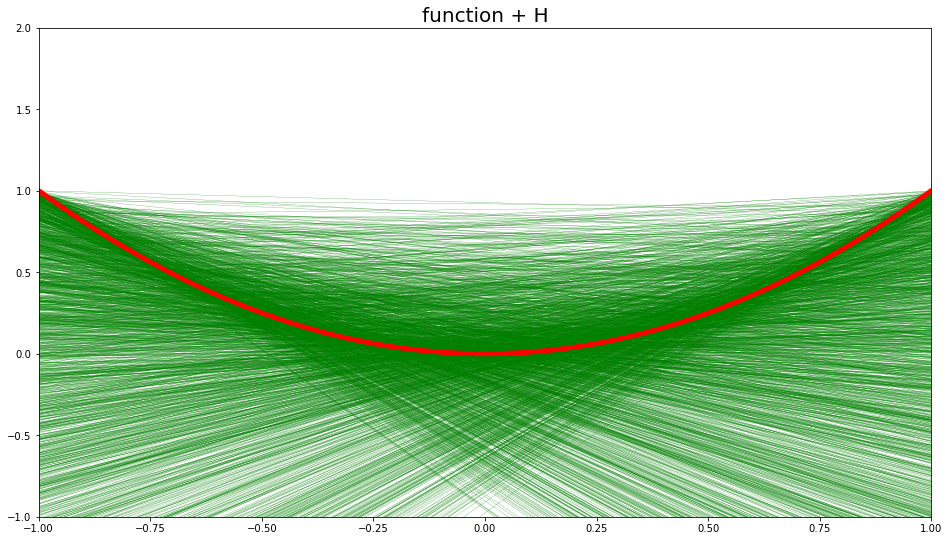

In [3]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)

targ_x = numpy.linspace(-1.5,1.5,100) # 100 linearly spaced numbers
targ_y = numpy.power(targ_x, 2)

for i in range(size):
    ls = numpy.linspace(-1.5,1.5,100)
    g_y = ls * g_a[i] + g_b[i]
    ax.plot(ls, g_y, color='green', zorder=0, linewidth=.2)

# plot the target function x^2
ax.plot(targ_x,targ_y,color='red',linewidth=5)
ax.set_title("function + H", fontsize=20)
plt.ylim([-1, 2])
plt.xlim([-1, 1])
plt.show()

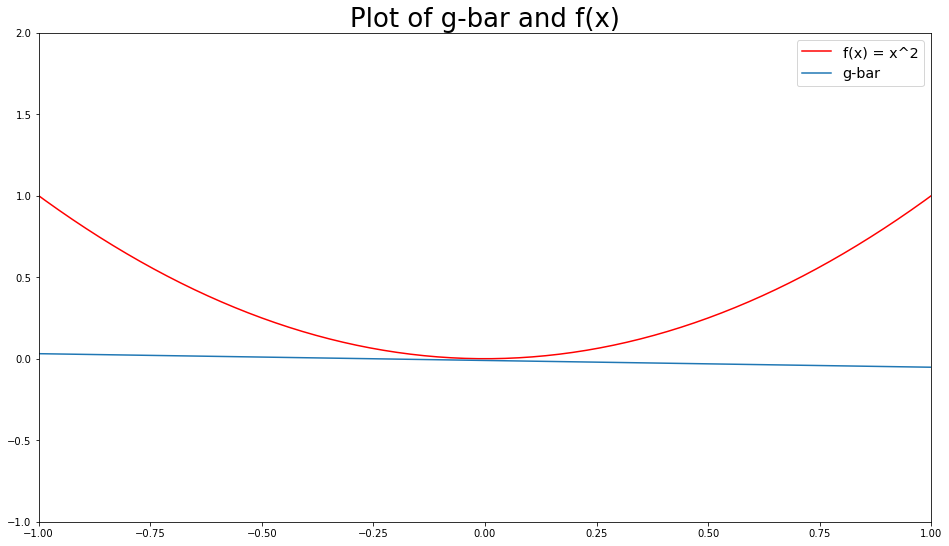

found g-bar slope is:  -0.010650321099643777


In [4]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)


#finding gbar (we can do it like this because expectation is linear: E_D[ax+b]=E_D[a]x+E_D[b])
g_bar_space = numpy.linspace(-1.5,1.5,100)
g_a_bar = numpy.mean(g_a)
g_b_bar = numpy.mean(g_b)

ax.set_title("Plot of g-bar and f(x)", fontsize=26)

ax.plot(targ_x,targ_y, color='red', label= "f(x) = x^2")
ax.plot(g_bar_space, (g_a_bar*g_bar_space + g_b_bar), label="g-bar")

ax.legend(markerscale=1,fontsize="x-large")
plt.ylim([-1, 2])
plt.xlim([-1, 1])
plt.show()

print("found g-bar slope is: ", g_b_bar)

In [5]:
# Test set
f = numpy.array([numpy.random.uniform(low=-1.0, high=1.0, size=size)])

lam = lambda x, y: numpy.mean((x * f + y - (f)**2)**2)

#find E_out for each D
g_Eout = list(map(lam, g_a, g_b))

# finding E[E_out]
E_Eout = numpy.mean(g_Eout)

In [6]:
# Finding the bias:
bias = numpy.mean((g_a_bar * f + g_b_bar - f ** 2)**2)

In [7]:
# Finding varx
lam2 = lambda x,y: (x * f + y - g_a_bar * f - g_b_bar) ** 2 

g_varx = numpy.mean(list(map(lam2, g_a, g_b)))

In [8]:
# Summary of information:
print("The E[E_out] found was: ", E_Eout)
print("The bias found is: ", bias)
print("varx found is: ", g_varx)
print("E[E_out]: ", E_Eout, " bias+var is: ", (bias + g_varx)) 

The E[E_out] found was:  0.5380176371493406
The bias found is:  0.2027175056697555
varx found is:  0.3353001314795847
E[E_out]:  0.5380176371493406  bias+var is:  0.5380176371493401
